<a href="https://colab.research.google.com/github/Nargis45/feature_selection/blob/main/select_features_using_information_gain_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#mounting the drive to import the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#providing the path of the file and storing the data in dataset and pandas library is used to study the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing_data.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
numeric_lst=['int16', 'int64', 'float16', 'float64']
numerical_cols=list(df.select_dtypes(include=numeric_lst).columns)

In [14]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
df=df[numerical_cols]

In [13]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df=df.drop('Id',axis=1)
df.head()

In [18]:
#train and test to avoid overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop(labels=['SalePrice'], axis=1), df['SalePrice'], test_size=0.3, random_state=0)

In [19]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [20]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [22]:
from sklearn.feature_selection import mutual_info_regression
#detemine the mutual information
mutual_info=mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.25453014, 0.20918932, 0.16732721, 0.54269502, 0.10527396,
       0.34160561, 0.25235216, 0.10330101, 0.16046337, 0.01172039,
       0.11424288, 0.38176154, 0.31295703, 0.22600327, 0.00282324,
       0.48171687, 0.02295423, 0.        , 0.27862121, 0.08546098,
       0.04807743, 0.02985563, 0.18058298, 0.18725835, 0.26868193,
       0.36989926, 0.3698742 , 0.07915723, 0.17310761, 0.01031419,
       0.01984848, 0.01750075, 0.00388356, 0.00376879, 0.        ,
       0.01055599])

In [23]:
mutual_info=pd.Series(mutual_info)
mutual_info

0     0.254530
1     0.209189
2     0.167327
3     0.542695
4     0.105274
5     0.341606
6     0.252352
7     0.103301
8     0.160463
9     0.011720
10    0.114243
11    0.381762
12    0.312957
13    0.226003
14    0.002823
15    0.481717
16    0.022954
17    0.000000
18    0.278621
19    0.085461
20    0.048077
21    0.029856
22    0.180583
23    0.187258
24    0.268682
25    0.369899
26    0.369874
27    0.079157
28    0.173108
29    0.010314
30    0.019848
31    0.017501
32    0.003884
33    0.003769
34    0.000000
35    0.010556
dtype: float64

In [24]:
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.542695
GrLivArea        0.481717
TotalBsmtSF      0.381762
GarageCars       0.369899
GarageArea       0.369874
YearBuilt        0.341606
1stFlrSF         0.312957
FullBath         0.278621
GarageYrBlt      0.268682
MSSubClass       0.254530
YearRemodAdd     0.252352
2ndFlrSF         0.226003
LotFrontage      0.209189
Fireplaces       0.187258
TotRmsAbvGrd     0.180583
OpenPorchSF      0.173108
LotArea          0.167327
BsmtFinSF1       0.160463
BsmtUnfSF        0.114243
OverallCond      0.105274
MasVnrArea       0.103301
HalfBath         0.085461
WoodDeckSF       0.079157
BedroomAbvGr     0.048077
KitchenAbvGr     0.029856
BsmtFullBath     0.022954
3SsnPorch        0.019848
ScreenPorch      0.017501
BsmtFinSF2       0.011720
YrSold           0.010556
EnclosedPorch    0.010314
PoolArea         0.003884
MiscVal          0.003769
LowQualFinSF     0.002823
BsmtHalfBath     0.000000
MoSold           0.000000
dtype: float64

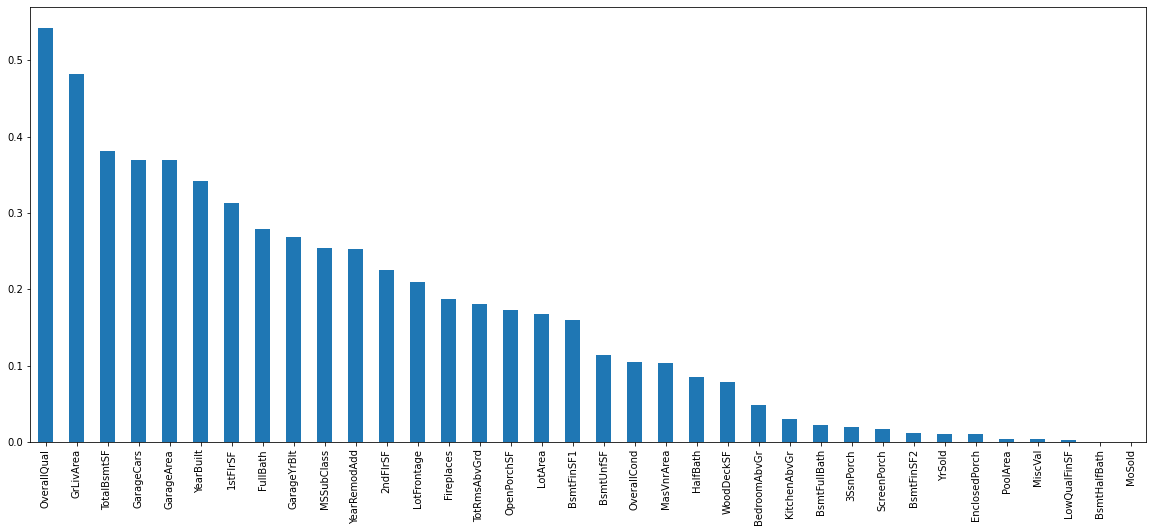

In [25]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [26]:
from sklearn.feature_selection import SelectKBest

In [27]:
#we will select the top 5 columns
sel_five_cols=SelectKBest(mutual_info_regression, k=5)
sel_five_cols.fit(X_train.fillna(0), y_train)
X_train.columns[sel_five_cols.get_support()] # get support gives indexes

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [32]:
#how to select top 20 values with the help of percentile
from sklearn.feature_selection import SelectPercentile

In [34]:
#we will select the top 20 columns
sel_ten_cols=SelectPercentile(mutual_info_regression, percentile=20) #20% of total dataset
sel_ten_cols.fit(X_train.fillna(0), y_train)
X_train.columns[sel_ten_cols.get_support()] # get support gives indexes

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')